# Load Dataset

In [1]:
# Import Pandas
import pandas as pd

# Load Metadata
metadata = pd.read_csv('CleaningDataset.csv', low_memory=False)

# Print the first three rows
metadata.head(3)

,Coffee Name,Tasting Notes,Description
0,Barbary Coast Blend,"Earthy, Dried Spice, Full Body","Hearty, dark roasted Arabica blend with bold, ..."
1,Bourbon Pecan,"Nutty Pecan, Sweet Bourbon, Smooth Finish",Light roasted Arabica blend enhanced with the ...
2,Breakfast Blend,"Milk Chocolate, Smooth Body, Bright Finish",Well balanced Arabica blend with complex finis...


In [2]:
#Print plot overviews of the first 5 Coffee Descriptions.
metadata['Description'].head()

0    Hearty, dark roasted Arabica blend with bold, ...
1    Light roasted Arabica blend enhanced with the ...
2    Well balanced Arabica blend with complex finis...
3    A great combination of rich, creamy coffee and...
4    A smooth blend of Colombian and Central Americ...
Name: Description, dtype: object

# Identifying Term Frequency for Description

In [3]:
# Activate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorizer
vect = CountVectorizer(analyzer='word',stop_words='english',lowercase=True)  
vects = vect.fit_transform(metadata['Description'])

td = pd.DataFrame(vects.todense()).iloc[:78]  
td.columns = vect.get_feature_names()
term_document_matrix = td.T
term_document_matrix.columns = ['Blend '+str(i) for i in range(1, 79)]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

#Number of Unique Words
print(term_document_matrix.shape)


(310, 79)


<AxesSubplot:>

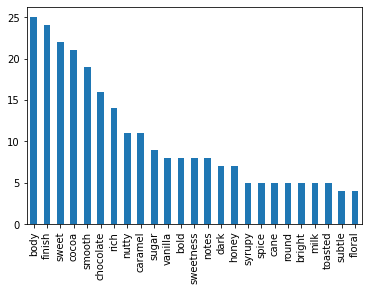

In [21]:
# Top 25 words 
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:25] 

text_file = open('TF-.txt', 'w')
term_document_matrix['total_count'].plot.bar()

# Identifying Term Frequency for Tasting Notes

In [5]:
# Activate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorizer
vect = CountVectorizer(analyzer='word',stop_words='english',lowercase=True)  
vects = vect.fit_transform(metadata['Tasting Notes'])

td = pd.DataFrame(vects.todense()).iloc[:78]  
td.columns = vect.get_feature_names()
term_document_matrix = td.T
term_document_matrix.columns = ['Blend '+str(i) for i in range(1, 79)]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)
print(term_document_matrix.shape)


(101, 79)


<AxesSubplot:>

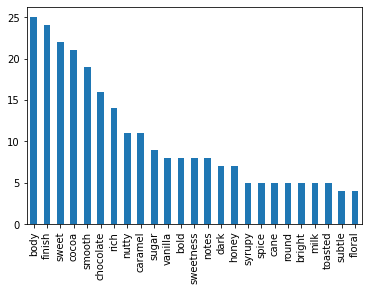

In [6]:
# Top 25 words 
top = term_document_matrix.sort_values(by ='total_count',ascending=False)[:25] 


top['total_count'].plot.bar()

# Recommendation based on Description

In [7]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. 
#Remove all english stop words such as 'the', 'a'
#Sets all words to lowercase
tfidf = TfidfVectorizer(analyzer='word',stop_words='english',lowercase=True)

#Replace NaN with an empty string
metadata['Description'] = metadata['Description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(metadata['Description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(78, 310)

In [8]:
tfidf.get_feature_names()

['50',
 'aa',
 'accented',
 'acid',
 'acidity',
 'adding',
 'affectionately',
 'african',
 'aftertaste',
 'alajeula',
 'almond',
 'almonds',
 'american',
 'americans',
 'amistad',
 'antigua',
 'ape',
 'arabica',
 'aroma',
 'auction',
 'award',
 'baked',
 'balance',
 'balanced',
 'bean',
 'beans',
 'best',
 'blend',
 'blended',
 'blue',
 'blueberry',
 'boded',
 'bodied',
 'body',
 'bold',
 'boquete',
 'bouquet',
 'bourbon',
 'brazil',
 'breakfast',
 'brew',
 'bright',
 'brimming',
 'brooding',
 'brown',
 'buns',
 'bursting',
 'buttery',
 'caffeine',
 'cajamarca',
 'caramel',
 'cedar',
 'central',
 'certified',
 'character',
 'cherry',
 'chestnut',
 'chiapas',
 'chocolate',
 'cinnamon',
 'classic',
 'cloves',
 'cocoa',
 'coffee',
 'coffees',
 'cold',
 'colombia',
 'colombian',
 'color',
 'combination',
 'combined',
 'combines',
 'combining',
 'complex',
 'continents',
 'costa',
 'county',
 'cream',
 'creamy',
 'create',
 'created',
 'crisp',
 'cup',
 'dark',
 'darkest',
 'daru',
 'decade

In [9]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [10]:
cosine_sim.shape

(78, 78)

In [11]:
cosine_sim[1]

array([0.06303551, 1.        , 0.03435994, 0.        , 0.16204378,
       0.03751442, 0.1047496 , 0.05220398, 0.01354826, 0.08947585,
       0.1035884 , 0.        , 0.01317103, 0.04637267, 0.01250463,
       0.02828801, 0.0497072 , 0.10201494, 0.11879988, 0.09642281,
       0.09025849, 0.07473008, 0.03020199, 0.27367482, 0.03700567,
       0.04720272, 0.05535121, 0.05120416, 0.11499106, 0.06595802,
       0.04029915, 0.21436814, 0.06530241, 0.04380946, 0.13808386,
       0.03704985, 0.02666882, 0.02311476, 0.03375353, 0.10345156,
       0.1049023 , 0.08790399, 0.08109316, 0.09465135, 0.16324527,
       0.02759209, 0.07612926, 0.06411835, 0.07527193, 0.04393266,
       0.02705854, 0.02499498, 0.04456052, 0.07155462, 0.02669501,
       0.03044811, 0.07586936, 0.0488234 , 0.05206793, 0.1272307 ,
       0.14311768, 0.        , 0.07304489, 0.11535491, 0.03268061,
       0.02653578, 0.03122631, 0.04725396, 0.03295675, 0.01274235,
       0.03848393, 0.028606  , 0.04673628, 0.        , 0.28187

In [12]:
#Construct a reverse map of indices and Coffee Names
indices = pd.Series(metadata.index, index=metadata['Coffee Name']).drop_duplicates()

indices[:10]

Coffee Name
Barbary Coast Blend          0
Bourbon Pecan                1
Breakfast Blend              2
Cappuccino Fudge             3
Caramel Nut Fudge            4
Chocolate Macadamia Nut      5
Chocolate Raspberry Cream    6
Cinnamon Bun                 7
Cinnamon Frangelico          8
Cinnamon Nut Sugar Cookie    9
dtype: int64

In [13]:
text_file = open('RecommendationDescription.txt', 'w')

text_file.write("CSCI 187 - Project Coffee \n" )
text_file.write("Matthew Rahardja \n" )
text_file.write("This Text File contains the top 5 similarity results\n" )
text_file.write("for each Coffee Blend based on description \n\n")


for ind in metadata.index:
    Selected_Blend = metadata['Coffee Name'][ind]
    Selected_Description = metadata['Description'][ind]
    idx = indices[Selected_Blend]

    # Get the pairwise similarity scores of all blends with that blend
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar coffee
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    coffee_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar coffee
    
    text_file.write("%s\n" % Selected_Blend)
    text_file.write("%s\n" % Selected_Description)

    text_file.write("\nBlend Index         Blend Name\n")
    text_file.write("%s\n" % metadata['Coffee Name'].iloc[coffee_indices])
    text_file.write("\nSimilarity Score\n")
    text_file.write("%s\n\n\n\n" % sim_scores)

text_file.close()


# Recommendation Based on Tasting Notes

In [14]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. 
#Remove all english stop words such as 'the', 'a'
#Sets all words to lowercase
tfidf = TfidfVectorizer(analyzer='word',stop_words='english',lowercase=True)

#Replace NaN with an empty string
metadata['Tasting Notes'] = metadata['Tasting Notes'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(metadata['Tasting Notes'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(78, 101)

In [15]:
tfidf.get_feature_names()

['acidity',
 'apple',
 'baked',
 'balanced',
 'berry',
 'bittersweet',
 'black',
 'blackberry',
 'blossom',
 'blueberry',
 'body',
 'bold',
 'bourbon',
 'bright',
 'brown',
 'butter',
 'butterscotch',
 'buttery',
 'cane',
 'caramel',
 'caramelized',
 'cedar',
 'cherry',
 'chocolate',
 'cinnamon',
 'citrus',
 'clean',
 'cocoa',
 'cream',
 'creamy',
 'dark',
 'deep',
 'dried',
 'dutch',
 'earthiness',
 'earthy',
 'fig',
 'finish',
 'floral',
 'florals',
 'frangelico',
 'fresh',
 'fruit',
 'fudge',
 'grape',
 'hazelnut',
 'heavy',
 'hint',
 'hips',
 'honey',
 'intense',
 'irish',
 'jasmine',
 'lavender',
 'lemon',
 'liqueur',
 'mango',
 'marjoram',
 'mild',
 'milk',
 'molasses',
 'notes',
 'nutmeg',
 'nuts',
 'nutty',
 'orange',
 'peach',
 'pecan',
 'raisins',
 'raspberry',
 'rich',
 'roasted',
 'rose',
 'round',
 'rounded',
 'rustic',
 'semisweet',
 'sharp',
 'silky',
 'smoky',
 'smooth',
 'soft',
 'spice',
 'spicy',
 'stone',
 'subtle',
 'sugar',
 'sugars',
 'sweet',
 'sweetness',
 'syr

In [16]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [17]:
cosine_sim.shape

(78, 78)

In [18]:
cosine_sim[1]

array([0.        , 1.        , 0.18803599, 0.15004225, 0.29231339,
       0.15772381, 0.08650415, 0.16812361, 0.08742161, 0.26629077,
       0.08919698, 0.07640756, 0.        , 0.11233114, 0.        ,
       0.16539101, 0.19540693, 0.08919698, 0.17408865, 0.11603567,
       0.13710735, 0.19897312, 0.        , 0.41040108, 0.15680633,
       0.        , 0.        , 0.        , 0.32120175, 0.32120175,
       0.        , 0.        , 0.        , 0.07024672, 0.22928213,
       0.07486486, 0.        , 0.        , 0.06735895, 0.07974793,
       0.        , 0.        , 0.08470553, 0.29226708, 0.11024532,
       0.07119279, 0.08838272, 0.        , 0.07617651, 0.        ,
       0.08339627, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.23453785, 0.        , 0.3460151 , 0.06857572,
       0.        , 0.18803599, 0.        , 0.28621255, 0.07410997,
       0.14991258, 0.32357635, 0.        , 0.07529373, 0.07975852,
       0.        , 0.08996209, 0.09133706, 0.        , 0.31358

In [19]:
#Construct a reverse map of indices and Coffee Names
indices = pd.Series(metadata.index, index=metadata['Coffee Name']).drop_duplicates()

indices[:10]

Coffee Name
Barbary Coast Blend          0
Bourbon Pecan                1
Breakfast Blend              2
Cappuccino Fudge             3
Caramel Nut Fudge            4
Chocolate Macadamia Nut      5
Chocolate Raspberry Cream    6
Cinnamon Bun                 7
Cinnamon Frangelico          8
Cinnamon Nut Sugar Cookie    9
dtype: int64

In [20]:
text_file = open('RecommendationFlavor.txt', 'w')

text_file.write("CSCI 187 - Project Coffee \n" )
text_file.write("Matthew Rahardja \n" )
text_file.write("This txt file contains the top 5 similarity results\n" )
text_file.write("for each Coffee Blend based on Flavor Notes \n\n")


for ind in metadata.index:
    Selected_Blend = metadata['Coffee Name'][ind]
    Selected_Description = metadata['Tasting Notes'][ind]
    idx = indices[Selected_Blend]

    # Get the pairwise similarity scores of all blends with that blend
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar coffee
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    coffee_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar coffee
    
    text_file.write("%s\n" % Selected_Blend)
    text_file.write("%s\n" % Selected_Description)

    text_file.write("\nBlend Index         Blend Name\n")
    text_file.write("%s\n" % metadata['Coffee Name'].iloc[coffee_indices])
    text_file.write("\nSimilarity Score\n")
    text_file.write("%s\n\n\n\n" % sim_scores)

text_file.close()
